# Logistic Regression for binary classification

In this problem, we introduce the Logistic Regression problem where we are going to do binary classification data. 

In [152]:
# Import Libraries
import math
import scipy.io
import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from __future__ import division

In [153]:
# Load the data
def load():
    mat = scipy.io.loadmat('myData.mat')
    XTrain = mat.get("XTrain")
    yTrain = mat.get("yTrain")

    XTest = mat.get("XTest")
    yTest = mat.get("yTest")
    return (XTrain, yTrain, XTest, yTest)

 The function "Compute_Grad" compute the gradient of the logistic regression objective function with respect to each parameter.


In [154]:
# 
def Compute_Grad(XTrain,yTrain,wHat):
    
    # Get dimensions
    (n, p) = XTrain.shape
    grad = np.zeros(wHat.shape)
    e = XTrain.dot(wHat[1:(p+1)]) + wHat[0]
    
    grad[0] = sum(np.exp(e) / (1 + np.exp(e)) - yTrain)
    
    for j in range(1, p+1):
        x = np.reshape(XTrain[:, j-1], (n, 1))
        xx = (yTrain - np.exp(e) / (1 + np.exp(e))) * x
        grad[j] = sum((np.exp(e) / (1 + np.exp(e)) - yTrain) * x)
    
    return grad

The function "Compute_Obj" will compute the objective function of the logistic rgression which we will try to minimize.

In [155]:
def Compute_Obj(XTrain,yTrain,wHat):
    # Get dimensions
    (n, p) = XTrain.shape
   
    e = XTrain.dot(wHat[1:(p + 1)]) + wHat[0] 
    
    obj = sum(np.log(1 + np.exp(e)) - yTrain * (e))
    return obj

The function Check_Convergence will check whether the objective value has converged by comparing the difference between consecutive objective values to the tolerance

In [156]:
def Check_Convergence(oldObj, newObj, tol):
    if (abs(oldObj - newObj) < tol):
        return True
    return False

The function will run gradient descent for logistic regression algorithm.

Parameters:

    wHat : the predicted parameters.
    
    objValues : the values of the objective function at each iteration. We will use this parameter to plot the objective function as the training improves.


In [157]:
def Gradient_Descent(XTrain, yTrain):

    # Set the step size. You can tune thus hyperparameters.
    alpha = 0.01
    
    # Get the size
    (n, p) = XTrain.shape
    
    # Set the tolerance
    tol = 0.001
    
    # Initiliaze wHat parameters
    wHat = np.zeros((p + 1, 1))
    
    oldObj = Compute_Obj(XTrain, yTrain, wHat)
    
    # Initiliaze the objVals list
    objValues = [oldObj]
    converged = False
    
    while(converged == False):
        # Compute the gradient
        grad = Compute_Grad(XTrain,yTrain,wHat)
      
        # update parameters
        wHat = wHat  - alpha * grad
      
        # Compute the new objective
        newObj = Compute_Obj(XTrain, yTrain, wHat)
      
        converged = Check_Convergence(oldObj, newObj, tol)
      
        oldObj = newObj
      
        # Add this newObj to the list of value objective
        objValues.append(newObj)
    
    return (wHat,objValues)

The function Predict will predict the labels of a new test dataset.

Parameters:

    yHat : the predicted values of y using the trained parameters wHat
    
    numErrors : the number of misclassified examples, i.e. the differences between yHat and yTest

In [158]:
def Predict(XTest, yTest, wHat):
    
    # get dimensions
    (m, p) = XTest.shape
  
    e = XTest.dot(wHat[1:(p+1)]) + wHat[0]
  
    yHat_0 = 1 /  ( 1 + np.exp(e))
  
    yHat_1 = (np.exp(e)) /  ( 1 + np.exp(e))
  
    yHat = np.zeros(yHat_0.shape)
  
    for i in range(m):
        if(yHat_0[i] > yHat_1[i]):
            yHat[i] = 0
        else:
            yHat[i] = 1
  
    numErrors = sum(yHat != yTest)
  
    return (yHat,sum(numErrors))

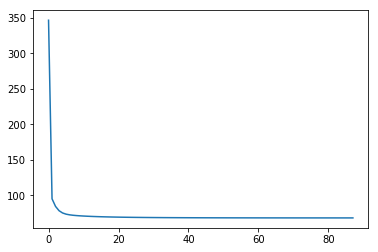

In [159]:
# Plot the value of the objective function on each iteration of gradient descent

(XTrain, yTrain, XTest, yTest) = load()

# Train logistic regression
(wHat, objVals) = Gradient_Descent(XTrain,yTrain)
x = range(0, len(objVals), 1)

plt.plot(x, objVals)
plt.show()

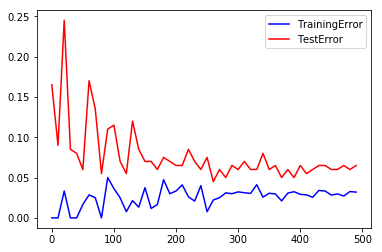

In [160]:
# Here, we will evaluate how the training and test error change as the training set size increases.
  
(n, p) = XTrain.shape
(m, p) = XTest.shape
x = range(0, n, 10)
    
TestError= []
TrainingError = []

k = 10
while (k <= n):
    subsetInds = permutation(n)
    subsetInds = subsetInds[0:k]
    
    XTrainSubset = XTrain[subsetInds, :]
    yTrainSubset = yTrain[subsetInds]
    
    (wHat, objVals) = Gradient_Descent(XTrainSubset, yTrainSubset)
    (yHat1, numErrors1) = Predict(XTrainSubset, yTrainSubset, wHat)
    TrainingError.append(numErrors1/k)
    
    (yHat2,numErrors2) = Predict(XTest,yTest,wHat)
    TestError.append(numErrors2/m)

    k = k + 10

[tr, tes] = plt.plot(x, TrainingError, 'b', x, TestError, 'r')
plt.legend([tr,tes], ["TrainingError","TestError"], loc=1)
plt.show()

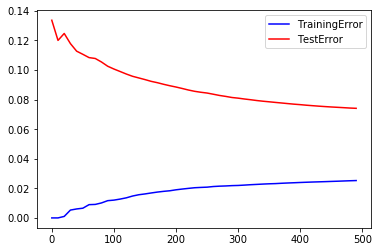

In [151]:
# Plot the average training and test error over these 10 samples.

# It should be noted that the value 10 could be tuned. 

(XTrain, yTrain, XTest, yTest) = load()

(n, p) = XTrain.shape
(m, p) = XTest.shape
x = range(0, n, 10)

  
TestError = []
TrainingError = []

listTest = []
listTraining = []
  
k = 10
while (k <=n):
    # Average over 10 samples. You can tune this value.
    j=0
    while (j <= 10):
        subsetInds = permutation(n)
        subsetInds = subsetInds[0:k]
        
        XTrainSubset = XTrain[subsetInds, :]
        yTrainSubset = yTrain[subsetInds]
      
        (wHat,objVals) = Gradient_Descent(XTrainSubset,yTrainSubset)
      
        (yHat1,numErrors1) = Predict(XTrainSubset,yTrainSubset,wHat)
        listTraining.append(numErrors1/k)
    
        (yHat2, numErrors2) = Predict(XTest,yTest,wHat)
        listTest.append(numErrors2/m)
      
        j = j + 1
    
    
    TrainingError.append(np.mean(listTraining))
    TestError.append(np.mean(listTest))
    
    k = k + 10
  
[tr, tes] = plt.plot(x, TrainingError, 'b', x, TestError, 'r')
plt.legend([tr,tes], ["TrainingError","TestError"], loc=1)
plt.show()